# Muons Spread wt new Toy Spatial Map
There are 2 differences with the work done so far:
1. The spatial distribution is reproduced with the toy spatial map (*before we use a gaussian distribution*).
1. The 10us aquisitions starts at the first NPE>0 (*before the first time was the first entry wt non-zero deposit*)

In [17]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [9]:
dirin = os.path.join("..", "..", "Data", "MuonsROI", "06-14-2020-QuantumEff")
filename = "MuonsWtSpatialMap_T10000_DT10000_Grp1_Seed123456789_Part1.csv"
df = pd.read_csv(os.path.join(dirin, filename), comment='#', index_col=False)
df = df[df.columns[:-1]]
df = df[df.pedetected>0]    # discard event 1 that is created empty when grp=1
print("[Info] Loaded {} events wt non-zero detections in 10us".format(len(df)))

[Info] Loaded 14821 events wt non-zero detections in 10us


In [11]:
def stddev_idslices_fun(row):
    # given an array of aquisitions, it return the std of activated slices
    # it create a populaion of slice ids, and compute stddev on them
    id_population = [item for id_list in [[i] * int(row[i]) for i in range(len(row))] for item in id_list]
    if id_population:    # check if the list of slice ids is not empty
        return np.std(id_population)
    else:
        return -1

In [15]:
marginals_df= df[df.pedetected <= 117]
std_event_marginals = marginals_df.apply(lambda row: stddev_idslices_fun(row[3:]), axis=1)
std_event_all = df.apply(lambda row: stddev_idslices_fun(row[3:]), axis=1)

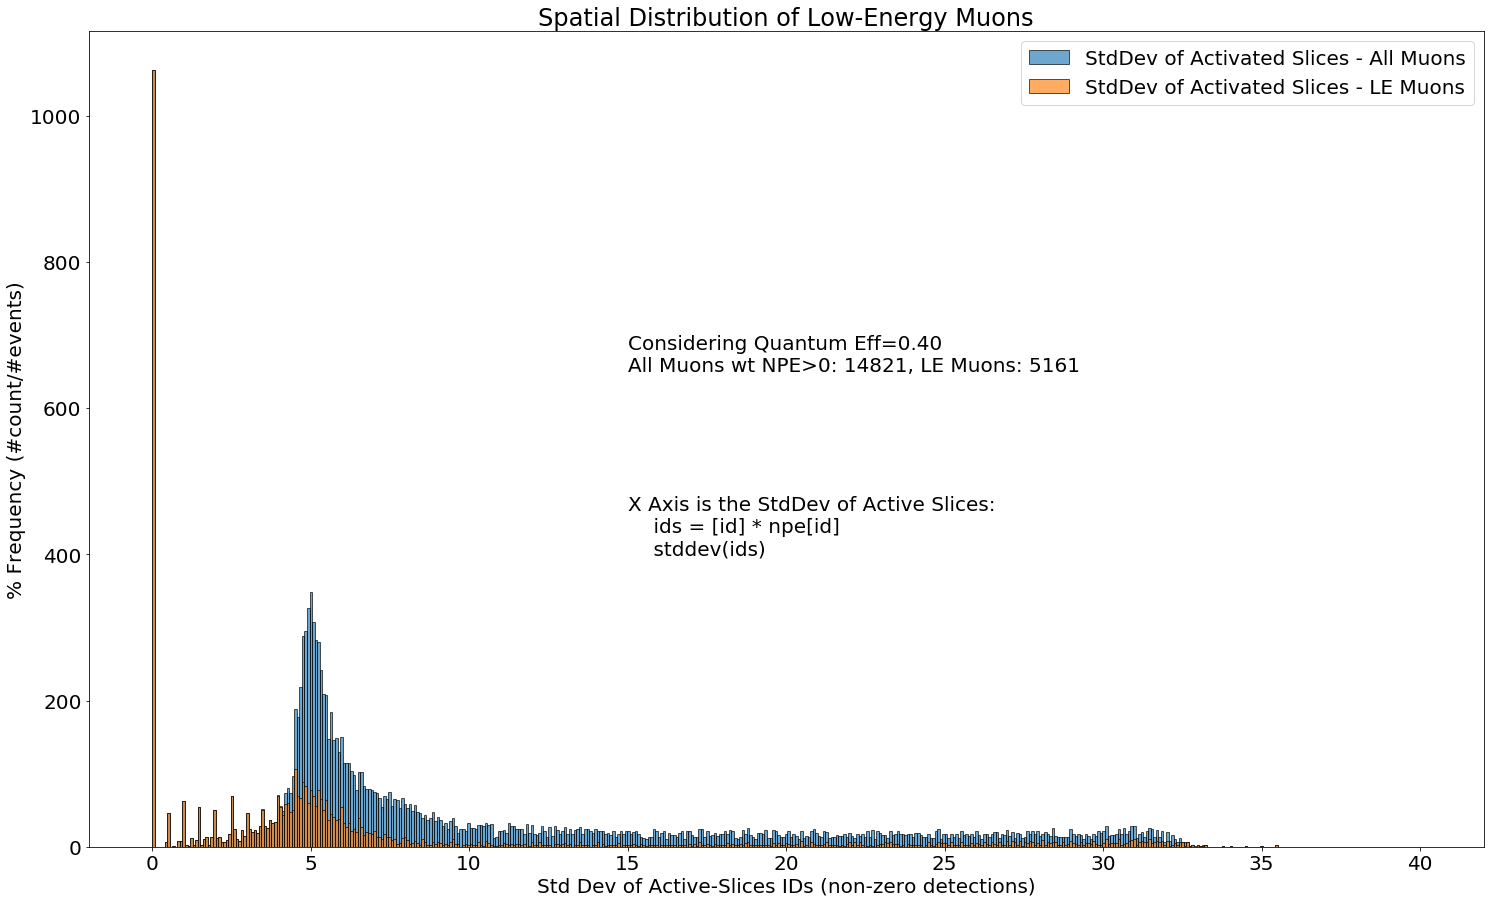

In [20]:
alpha=0.65
bins = np.linspace(0, 40, 500)
plt.title("Spatial Distribution of Low-Energy Muons")
plt.xlabel("Std Dev of Active-Slices IDs (non-zero detections)")
plt.ylabel("% Frequency (#count/#events)")
plt.hist(std_event_all, bins=bins, label="StdDev of Activated Slices - All Muons", density=False, edgecolor='k', alpha=alpha)
plt.hist(std_event_marginals, bins=bins, label="StdDev of Activated Slices - LE Muons", density=False, edgecolor='k', alpha=alpha)
plt.text(15, 650, "Considering Quantum Eff=0.40\n" \
                  "All Muons wt NPE>0: {}, " \
                  "LE Muons: {}".format(len(df), len(marginals_df)))
plt.text(15, 400, "X Axis is the StdDev of Active Slices:\n" \
                  "    ids = [id] * npe[id]\n" \
                  "    stddev(ids)")
plt.legend()
plt.show()

In [22]:
std_event_marginals.describe()

count    5161.000000
mean        7.465177
std         8.820477
min         0.000000
25%         1.699673
50%         4.721506
75%         7.187149
max        35.500000
dtype: float64